In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

X, y = loadlocal_mnist(
        images_path='data/Mnist/train-images-idx3-ubyte', 
        labels_path='data/Mnist/train-labels-idx1-ubyte')
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\n1st row', X[0])
print(y[0])
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

<Figure size 640x480 with 1 Axes>

In [2]:
train_size = 50000
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
shuffle_index = np.random.permutation(train_size)
# print(shuffle_index) 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
def get_Y_on_num(y, num):
    y_list = [1 if elem == 5 else 0 for elem in y]
    Y = np.reshape(y_list, (len(y_list), 1))
    return y_list, Y
def min_max_scaler(X, low, high):
    return (X - low) / (high - low)
    
y_train_1d_5, y_train_2d_5 = get_Y_on_num(y_train, 5)
y_test_1d_5, y_test_2d_5 = get_Y_on_num(y_test, 5)

X_train_scaled = min_max_scaler(X_train, 0, 255)
X_test_scaled = min_max_scaler(X_test, 0, 255)

X_train_s = X_train[:4]
y_train_2d_5_s = y_train_2d_5[:4]
print(X_train_scaled[0])

(50000, 784)
(10000, 784)
(50000,)
(10000,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

In [136]:
# from sklearn.linear_model import SGDClassifier 
# sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train_1d_5)
# cross_val_score(sgd_clf, X_train, y_train_1d_5, cv=3, scoring="accuracy")

# from sklearn.base import BaseEstimator
# class Never5Classifier(BaseEstimator): 
#     def fit(self, X, y=None):
#         pass
#     def predict(self, X):
#         return np.zeros((len(X), 1), dtype=bool)
# never_5_clf = Never5Classifier()
# cross_val_score(never_5_clf, X_train, y_train_1d_5, cv=3, scoring="accuracy")

In [3]:
# from ipynb.fs.full.Neural_Network import NeuralNetH1
# from ipynb.fs.full.Logistic_Regression import LogisticRegression
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def getX1(self, X):
        n_samples, n_features = X.shape
        ones = np.ones(shape=(n_samples, 1))
        X1 = np.concatenate((X, ones),axis = 1)
        return X1
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        X1 = self.getX1(X)   
        self.weights = np.random.randn(n_features + 1, 1)
        costs = []
        # Step 1: Loop until iterate enough
        # h(w) = 1 / (1 + pow(e, -wx))
        # C(w) = - (y * log(h) + (1 - y) * log(1 - h))
        # J(w) = 1 / m * Sum(C)
        # dJ/dw = 1 / m * Sum(h - y) * x
        for k in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            w_x = np.dot(X1, self.weights)
#             print('X1', X1.shape)
#             print('w', self.weights.shape)
#             print('w_x', w_x)
            h_x = self.sigmoid(w_x)
#             print(h_x)

            # Step 2: Compute cost over training set
            # wrong impl: should simply MULTIPLY y by log(h) rather than np.dot
#             cost = (1 / n_samples) * np.sum(np.dot(y, np.log(h_x)) + np.dot((1 - y), np.log(1 - h_x)))
            cost = -(1 / n_samples) * np.sum(y * np.log(h_x) + (1 - y) * np.log(1 - h_x))
            
            costs.append(cost)
            if k % (n_iters / 10) == 0:
#             if k % 100 == 0:
                print(f"Cost at iteration {k}: {cost}")

#             print(np.dot(X1.T, h_x - y))
            # Step 3: Compute the gradients
            dJ_dw = 1.0 / n_samples * np.dot(X1.T, h_x - y)
            
            # Step 4: Update the parameters
            self.weights -= learning_rate * dJ_dw
        return self.weights, costs

    def predict(self, X):
        X1 = self.getX1(X)
        w_x = np.dot(X1, self.weights)
        h_x = self.sigmoid(w_x)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in h_x]
        return y_predict_labels
    
    def predict_proba(self, X):
        X1 = self.getX1(X)
        w_x = np.dot(X1, self.weights)
        h_x = self.sigmoid(w_x)
        return h_x

In [4]:
_, num_fea = X_train.shape
# nn_clf = NeuralNetH1(n_inputs = num_fea, n_outputs=1, n_hidden1=2)
# nn_clf.train(X_train, y_train_5, n_iters=2000, eta=0.7)
reg_clf = LogisticRegression()
# weights, costs = reg_clf.train_gradient_descent(X_train, y_train_2d_5, 0.1, 10)
weights, costs = reg_clf.train_gradient_descent(X_train_scaled, y_train_2d_5, 0.05, 10000)


Cost at iteration 0: 1.043261022233479
Cost at iteration 1000: 0.30696158636344983
Cost at iteration 2000: 0.22904384371535919
Cost at iteration 3000: 0.1987282637777093
Cost at iteration 4000: 0.18141032260596146
Cost at iteration 5000: 0.16954455151006537
Cost at iteration 6000: 0.16066429136540264
Cost at iteration 7000: 0.1536624411518905
Cost at iteration 8000: 0.14794625399505798
Cost at iteration 9000: 0.14316210761430284


[[8929  156]
 [ 255  660]]
precision:  0.8088235294117647
recall:  0.7213114754098361
f1-score:  0.7625649913344887


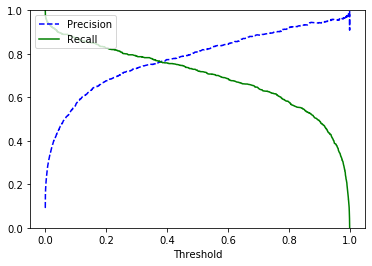

auc:  0.9546276664531399


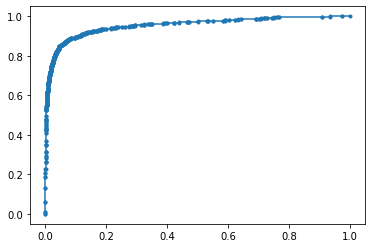

In [169]:
y_test_p = reg_clf.predict(X_test_scaled)
evaluate_binary_clf_bin(y_test_2d_5, y_test_p)
y_test_proba = reg_clf.predict_proba(X_test_scaled)
evaluate_binary_clf_proba(y_test_2d_5, y_test_proba)

In [162]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(321)
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.clf()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

def evaluate_binary_clf_proba(y_actual, y_prob):
    plt.clf()
    precisions, recalls, thresholds = precision_recall_curve(y_actual, y_prob)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    plt.plot(fpr, tpr, marker='.')
    auc = roc_auc_score(y_actual, y_prob)
    print('auc: ', auc)
    plt.show()

def evaluate_binary_clf_bin(y_actual, y_bin):
    plt.clf()
    print(confusion_matrix(y_actual, y_bin))
    print('precision: ', precision_score(y_actual, y_bin))
    print('recall: ', recall_score(y_actual, y_bin))
    print('f1-score: ', f1_score(y_actual, y_bin))

In [170]:
class NeuralNetH1():
    
    def __init__(self, n_inputs, n_outputs, n_hidden1):
        # Initialize weight matrices and bias vectors
        self.W0 = np.random.randn(n_inputs, n_hidden1)
        self.b0 = np.zeros((1, n_hidden1))
        self.W1 = np.random.randn(n_hidden1, n_outputs)
        self.b1 = np.zeros((1, n_outputs))

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def forward_pass(self, X):
        # Compute activations and outputs of hidden units: H = sigmoid(W_0*X + b0)
        H1_i = np.dot(X, self.W0) + self.b0
        H1_o = self.sigmoid(H1_i)
        # Compute activations and outputs of output units: Y = sigmoid(W_1*H + b1)
        Y_i = np.dot(H1_o, self.W1) + self.b1
        Y_o = self.sigmoid(Y_i)

        outputs = {
                "H1_o": H1_o,
                "Y_o": Y_o,
                }

        return outputs

    def cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost

    def backward_pass(self, X, Y, n_samples, outputs):
        Y_o = outputs['Y_o']
        H1_o = outputs['H1_o']
        
        # e2 = Y_o - Y
        # e1 = W1*e2*H1*(1-H1)        -----    VERY IMPORTANT: *h2*(1-h2) is SCALING
        # dJ/dw1 = H1*e2
        # dJ/dw0 = X*e1
        
        e2 = Y_o - Y
        dW1 = (1 / n_samples) * np.dot(H1_o.T, e2)
        db1 = (1 / n_samples) * np.sum(e2)
# -----VERY IMPORTANT: *H1*(1-H1) is SCALING NOT PRODUCTION: *H1*(1-H1) √ | .dot(H1.dot(1-H1)) X
#         print(Y_o.shape)
#         print(Y)
#         print(e2.shape)
#         print(self.W1.shape)
#         print(H1_o.shape)
        e1 = (np.dot(e2, self.W1.T)) * H1_o * (1 - H1_o)

        dW0 = (1 / n_samples) * np.dot(X.T, e1)
        db0 = (1 / n_samples) * np.sum(e1)

        gradients = {
                "dW1": dW1,
                "db1": db1,
                "dW0": dW0,
                "db0": db0,
                }

        return gradients

    def update_weights(self, gradients, eta):
        self.W1 = self.W1 - eta * gradients["dW1"]
        self.b1 = self.b1 - eta * gradients["db1"]
        
        self.W0 = self.W0 - eta * gradients["dW0"]
        self.b0 = self.b0 - eta * gradients["db0"]

    def train(self, X, y, n_iters=500, eta=0.3):
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs['Y_o'], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
#             if i % 1 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')
            self.update_weights(gradients, eta)


    def predict(self, X):
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["Y_o"]]
        return np.array(y_pred)[:, np.newaxis]
    def predict_proba(self, X):
        outputs = self.forward_pass(X)
        return outputs['Y_o']

In [175]:
_, num_fea = X_train.shape
nn_clf = NeuralNetH1(n_inputs = num_fea, n_outputs=1, n_hidden1=6)
nn_clf.train(X_train_scaled, y_train_2d_5, n_iters=1000, eta=0.05)

Cost at iteration 0: 3.0686
Cost at iteration 100: 0.3211
Cost at iteration 200: 0.2932
Cost at iteration 300: 0.2893
Cost at iteration 400: 0.2874
Cost at iteration 500: 0.2857
Cost at iteration 600: 0.2842
Cost at iteration 700: 0.2828
Cost at iteration 800: 0.2814
Cost at iteration 900: 0.28


[[9085    0]
 [ 915    0]]
precision:  0.0
recall:  0.0
f1-score:  0.0


/Users/mtdp1/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mtdp1/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


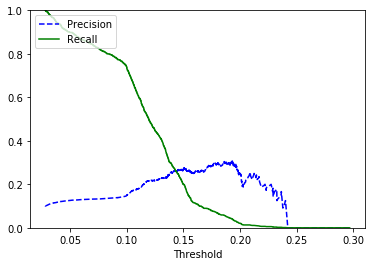

auc:  0.7308731440463625


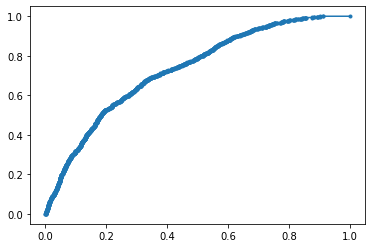

In [176]:
y_test_bin_nn = nn_clf.predict(X_test_scaled)
evaluate_binary_clf_bin(y_test_2d_5, y_test_bin_nn)
y_test_proba_nn = nn_clf.predict_proba(X_test_scaled)
evaluate_binary_clf_proba(y_test_2d_5, y_test_proba_nn)